# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")
# YOUR CODE HERE!
print(api_key)

441efcd418ea49dd9340a68a8716b438


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
# YOUR CODE HERE!

In [4]:
crisis_news_en = newsapi.get_everything(
    q='financial AND crisis AND 2008',
    language='en'
)

In [5]:
# Fetch the Bitcoin news articles
crisis_news_en_Bitcoin = newsapi.get_everything(
    q= "Bitcoin",
    language="en"
)
# YOUR CODE HERE!

In [6]:
# Fetch the Ethereum news articles
crisis_news_en_Ethereum = newsapi.get_everything(
    q= "Ethereum",
    language="en"
)
# YOUR CODE HERE!

In [7]:
mylist=[]
for i in range(5): 
    mylist.append(i)

In [8]:
print(mylist)

[0, 1, 2, 3, 4]


In [9]:
print(crisis_news_en_Bitcoin)

{'status': 'ok', 'totalResults': 4871, 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'}, 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker', 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?', 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…', 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159', 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png', 'publishedAt': '2020-12-03T22:00:00Z', 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless

In [10]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_list= []
for article in crisis_news_en_Bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_list.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        
        pass
    
    

# Bitcoin_list
    
 
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_list)


# # Reorder DataFrame columns

cols = ["compound", "text", "date", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

#YOUR CODE HERE!

,compound,text,date,positive,negative,neutral
0,0.6369,Visa has partnered with cryptocurrency startup...,2020-12-03,0.162,0.0,0.838
1,0.6486,After reaching a previous all-time high on Nov...,2020-12-16,0.174,0.0,0.826
2,0.4019,Its been almost three years to the day since t...,2020-12-16,0.072,0.0,0.928
3,0.2023,"In November 2017, after an absolutely massive,...",2020-11-20,0.050,0.0,0.950
4,0.0000,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.000,0.0,1.000


In [11]:
# Create the ethereum sentiment scores DataFrame
Ethereum_list= []
for article in crisis_news_en_Ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_list.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        
        pass
    
    

# Bitcoin_list
    
 
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_list)


# # Reorder DataFrame columns

cols = ["compound", "text", "date", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

# YOUR CODE HERE!

,compound,text,date,positive,negative,neutral
0,0.0000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.000,0.0,1.000
1,0.0000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.000,0.0,1.000
2,0.4215,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.088,0.0,0.912
3,0.0000,FILE PHOTO: Representations of virtual currenc...,2020-12-16,0.000,0.0,1.000
4,0.0000,FILE PHOTO: A representation of virtual curren...,2020-12-16,0.000,0.0,1.000


In [12]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()
# YOUR CODE HERE!

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.238942,0.070053,0.009368,0.920579
std,0.357613,0.079392,0.028447,0.083627
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.050000,0.000000,0.950000
75%,0.532650,0.157000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [13]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()
# YOUR CODE HERE!

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.073660,0.045400,0.016800,0.937800
std,0.279728,0.077994,0.052501,0.106015
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.068250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download()

from string import punctuation
import re

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [15]:
# Expand the default stopwords list if necessary
Stopwords_Eng = stopwords.words("english")
Stopwords_Eng

lemmatizer = WordNetLemmatizer() 

# YOUR CODE HERE!

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = [word.lower() for word in words if word.lower() not in Stopwords_Eng]

    # Remove the punctuation
    words = [word for word in words if word not in punctuation]
    # Remove the stop words
    words = [w for w in words if not w in Stopwords_Eng]  
  
  
    # Lemmatize Words into root words
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

In [17]:
# Create a new tokens column for bitcoin
Bitcoin_df["tokens"] = Bitcoin_df["text"].apply(tokenizer)
Bitcoin_df.head()
# YOUR CODE HERE!

,compound,text,date,positive,negative,neutral,tokens
0,0.6369,Visa has partnered with cryptocurrency startup...,2020-12-03,0.162,0.0,0.838,"[visa, partnered, cryptocurrency, startup, blo..."
1,0.6486,After reaching a previous all-time high on Nov...,2020-12-16,0.174,0.0,0.826,"[reaching, previous, all-time, high, november,..."
2,0.4019,Its been almost three years to the day since t...,2020-12-16,0.072,0.0,0.928,"[almost, three, year, day, since, price, bitco..."
3,0.2023,"In November 2017, after an absolutely massive,...",2020-11-20,0.050,0.0,0.950,"[november, 2017, absolutely, massive, two-mont..."
4,0.0000,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.000,0.0,1.000,"[unlike, ‘, conventional, ’, cryptocurrencies,..."


In [18]:
# Create a new tokens column for ethereum
Ethereum_df["tokens"] = Ethereum_df["text"].apply(tokenizer)
Ethereum_df.head()
# YOUR CODE HERE!

,compound,text,date,positive,negative,neutral,tokens
0,0.0000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
1,0.0000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,0.4215,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
3,0.0000,FILE PHOTO: Representations of virtual currenc...,2020-12-16,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
4,0.0000,FILE PHOTO: A representation of virtual curren...,2020-12-16,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
bitcoin_tokens = []
for tokens in Bitcoin_df.tokens:
    bitcoin_tokens += tokens
print(bitcoin_tokens)

['visa', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish', 'o…', '+2239', 'char', 'reaching', 'previous', 'all-time', 'high', 'november', '30th', '2020', 'december', '1st', '2020', 'bitcoin', 'trading', 'well', '20,000', 'surpassed', 'previous', 'peak', 'price', 'bitcoins', 'value', 'rapidly…', '+1062', 'char', 'almost', 'three', 'year', 'day', 'since', 'price', 'bitcoin', 'close', 'breaking', '20,000', 'ceiling', 'came', 'crashing', 'wednesday', 'arbitrary', 'milestone', 'hodlers', 'dream', 'finally…', '+1273', 'char', 'november', '2017', 'absolutely', 'massive', 'two-month', 'rally', 'bitcoin', 'passed', '10,000', 'first', 'time', 'next', '20', 'day', 'soared', 'even', 'higher', 'reaching', 'price', '19,665', 'roug…', '+6738', 'char', 'unlike', '‘', 'conventional', '’', 'cryptocurrencies', 'central', 'bank', 'control', 'digital', 'yuan',

In [21]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_count = Counter(ngrams(bitcoin_tokens, n=2))
print(dict(bitcoin_bigram_count))
# YOUR CODE HERE!

{('visa', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'o…'): 1, ('o…', '+2239'): 1, ('+2239', 'char'): 1, ('char', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'all-time'): 1, ('all-time', 'high'): 2, ('high', 'november'): 1, ('november', '30th'): 1, ('30th', '2020'): 1, ('2020', 'december'): 1, ('december', '1st'): 1, ('1st', '2020'): 1, ('2020', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', '20,000'): 1, ('20,000', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'price'

In [22]:
ethereum_tokens = []
for tokens in Ethereum_df.tokens:
    ethereum_tokens += tokens
print(ethereum_tokens)

['file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', '3', '2018', 'reuters/dado', 'ruvic/illustration', 'london', 'reuters', '…', '+1237', 'char', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', '3', '2018', 'reuters/dado', 'ruvic/illustration', 'london', 'reuters', '…', '+1237', 'char', 'london', 'reuters', 'digital', 'currency', 'ethereum', 'xrp', 'soared', 'monday', 'gaining', 'momentum', 'bitcoin', 'powered', 'towards', 'all-time', 'high', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency…', '+1950', 'char', 'file', 'photo', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'picture', 'illustration', 'taken', 'taken', 'march', '13', '2020', 'reuters/dado', 'ruvic/illustration', 'london', 'reuters', 'major', 'u.s.', 'cryptocurrency…', '+1031', 'char', 'file',

In [23]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(ethereum_tokens, n=2))
print(dict(eth_bigram_counts))

# YOUR CODE HERE!

{('file', 'photo'): 10, ('photo', 'representation'): 10, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 11, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', '3'): 2, ('3', '2018'): 2, ('2018', 'reuters/dado'): 2, ('reuters/dado', 'ruvic/illustration'): 8, ('ruvic/illustration', 'london'): 6, ('london', 'reuters'): 7, ('reuters', '…'): 2, ('…', '+1237'): 2, ('+1237', 'char'): 2, ('char', 'file'): 4, ('char', 'london'): 1, ('reuters', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'monday'): 1, ('monday', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'all-time'): 1, ('all-time', 'high'): 1, ('high', 'file'): 1, ('virtual'

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
print(dict(bitcoin_bigram_count.most_common(10)))

# YOUR CODE HERE!

{('file', 'photo'): 4, ('photo', 'representation'): 4, ('illustration', 'taken'): 4, ('2020', 'reuters/dado'): 4, ('char', 'reuters'): 3, ('reuters', 'staff'): 3, ('staff', 'file'): 3, ('representation', 'virtual'): 3, ('virtual', 'currency'): 3, ('currency', 'bitcoin'): 3}


In [26]:
# Get the top 10 words for Ethereum
print(dict(eth_bigram_counts.most_common(10)))

# YOUR CODE HERE!

{('virtual', 'currency'): 11, ('file', 'photo'): 10, ('photo', 'representation'): 10, ('representation', 'virtual'): 9, ('currency', 'bitcoin'): 9, ('illustration', 'taken'): 9, ('2020', 'reuters/dado'): 9, ('reuters/dado', 'ruvic/illustration'): 8, ('bitcoin', 'seen'): 8, ('london', 'reuters'): 7}


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [28]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

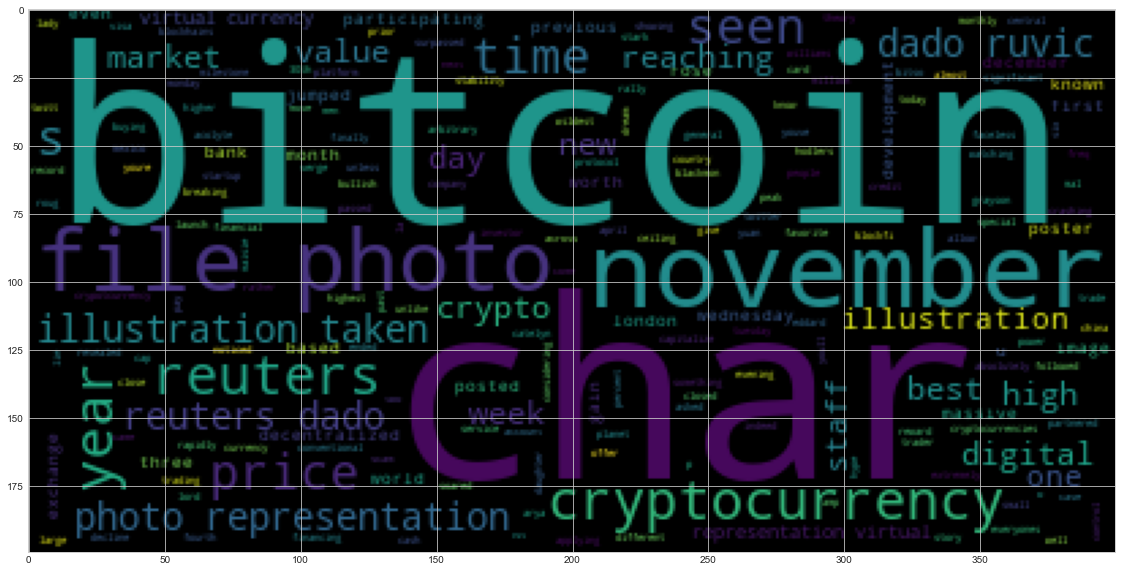

In [29]:
# Generate the Bitcoin word clouddef process_text(doc):
bitcoin_words = ''
for token in Bitcoin_df.tokens:
    bitcoin_words += str(token)
bitcoin_string = " ".join(str(token) for token in tokenizer(bitcoin_words))
bitcoin_cloud = WordCloud().generate(bitcoin_string)
plt.figure(figsize=(20,10))
plt.imshow(bitcoin_cloud)
# YOUR CODE HERE!

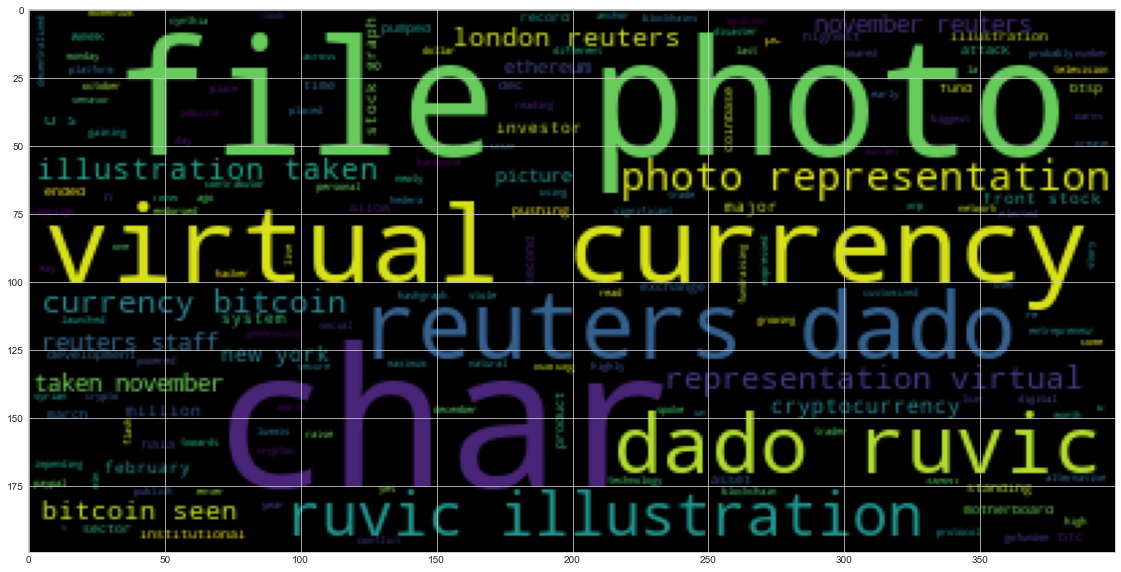

In [30]:
# Generate the Ethereum word cloud
ethereum_words = ''
for token in Ethereum_df.tokens:
    ethereum_words += str(token)
ethereum_string = " ".join(str(token) for token in tokenizer(ethereum_words))
ethereum_cloud = WordCloud().generate(ethereum_string)
plt.figure(figsize=(20,10))
plt.imshow(ethereum_cloud)
# YOUR CODE HERE!

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together
bitcoin_concat = ' '.join(Bitcoin_df.text)
bitcoin_concat
# YOUR CODE HERE!

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move give

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_ner = nlp(bitcoin_concat)

# Add a title to the document
bitcoin_ner.user_data['Title'] = 'Bitcoin NER'

# YOUR CODE HERE!

In [37]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

# YOUR CODE HERE!

In [38]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)
# YOUR CODE HERE!

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesd

---

## Ethereum NER

In [40]:
# Concatenate all of the bitcoin text together
ethereum_concat = ' '.join(Ethereum_df.text)
ethereum_concat
# YOUR CODE HERE!

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 

In [41]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_concat)

# YOUR CODE HERE!

# Add a title to the document
ethereum_ner.user_data['Title'] = 'Ethereum NER'

# YOUR CODE HERE!

In [42]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

# YOUR CODE HERE!

In [43]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)
# YOUR CODE HERE!

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin 